In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [8]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [9]:
# Creat an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, amd set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | coahuayana
Processing Record 2 of Set 1 | fortuna
Processing Record 3 of Set 1 | faanui
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | pierre
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | tadine
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | narsaq
Processing Record 10 of Set 1 | westport
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | kalemie
Processing Record 13 of Set 1 | huilong
Processing Record 14 of Set 1 | ondorhaan
City not found. Skipping...
Processing Record 15 of Set 1 | mocorito
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | bud
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | ayagoz
Processing Record 22 of Set 1 | chuy
P

Processing Record 35 of Set 4 | port elizabeth
Processing Record 36 of Set 4 | banjarmasin
Processing Record 37 of Set 4 | kruisfontein
Processing Record 38 of Set 4 | remedios
Processing Record 39 of Set 4 | mingguang
Processing Record 40 of Set 4 | quartucciu
Processing Record 41 of Set 4 | yakeshi
Processing Record 42 of Set 4 | baishishan
Processing Record 43 of Set 4 | komsomolskiy
Processing Record 44 of Set 4 | bethel
Processing Record 45 of Set 4 | rio hondo
Processing Record 46 of Set 4 | bakchar
Processing Record 47 of Set 4 | cabedelo
Processing Record 48 of Set 4 | cayenne
Processing Record 49 of Set 4 | oltu
Processing Record 50 of Set 4 | lompoc
Processing Record 1 of Set 5 | porgera
Processing Record 2 of Set 5 | san cristobal
Processing Record 3 of Set 5 | darnah
Processing Record 4 of Set 5 | laguna
Processing Record 5 of Set 5 | fairbanks
Processing Record 6 of Set 5 | saucillo
Processing Record 7 of Set 5 | bluff
Processing Record 8 of Set 5 | sandwick
Processing Rec

Processing Record 28 of Set 8 | maceio
Processing Record 29 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 30 of Set 8 | litovko
Processing Record 31 of Set 8 | san policarpo
Processing Record 32 of Set 8 | dalby
Processing Record 33 of Set 8 | namatanai
Processing Record 34 of Set 8 | barberton
Processing Record 35 of Set 8 | mount isa
Processing Record 36 of Set 8 | emmett
Processing Record 37 of Set 8 | port alfred
Processing Record 38 of Set 8 | brae
Processing Record 39 of Set 8 | diamantino
Processing Record 40 of Set 8 | mossoro
Processing Record 41 of Set 8 | soe
Processing Record 42 of Set 8 | batemans bay
Processing Record 43 of Set 8 | raton
Processing Record 44 of Set 8 | quatre cocos
Processing Record 45 of Set 8 | manavalakurichi
Processing Record 46 of Set 8 | rosetta
Processing Record 47 of Set 8 | aripuana
Processing Record 48 of Set 8 | vanimo
Processing Record 49 of Set 8 | bobonong
City not found. Skipping...
Processing Record 50 of Set 8 | l

Processing Record 12 of Set 12 | port hawkesbury
Processing Record 13 of Set 12 | rio grande
Processing Record 14 of Set 12 | kargat
Processing Record 15 of Set 12 | yeniseysk
Processing Record 16 of Set 12 | moranbah
Processing Record 17 of Set 12 | changji
Processing Record 18 of Set 12 | chapada dos guimaraes
Processing Record 19 of Set 12 | djambala
Processing Record 20 of Set 12 | krasnomayskiy
Processing Record 21 of Set 12 | husavik
Processing Record 22 of Set 12 | korem
Processing Record 23 of Set 12 | puerto madero
Processing Record 24 of Set 12 | leh
Processing Record 25 of Set 12 | muros
Processing Record 26 of Set 12 | vung tau
Processing Record 27 of Set 12 | hualmay
Processing Record 28 of Set 12 | litoral del san juan
City not found. Skipping...
Processing Record 29 of Set 12 | baft
Processing Record 30 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 31 of Set 12 | kaputa
Processing Record 32 of Set 12 | baruun-urt
Processing Record 33 of Set 12 | lab

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coahuayana,18.7333,-103.6833,81.95,41,0,4.43,MX,2022-01-30 23:55:52
1,Fortuna,40.5982,-124.1573,56.43,80,0,6.91,US,2022-01-30 23:55:53
2,Faanui,-16.4833,-151.7500,80.98,71,17,11.61,PF,2022-01-30 23:55:53
3,Pierre,44.3683,-100.3510,39.27,54,83,1.01,US,2022-01-30 23:55:54
4,Rikitea,-23.1203,-134.9692,77.11,71,100,5.77,PF,2022-01-30 23:54:55
5,Tadine,-21.5500,167.8833,81.97,79,97,9.26,NC,2022-01-30 23:55:54
6,Ushuaia,-54.8000,-68.3000,44.26,70,40,28.77,AR,2022-01-30 23:51:13
7,Narsaq,60.9167,-46.0500,18.52,83,100,19.66,GL,2022-01-30 23:54:12
8,Westport,41.1415,-73.3579,23.76,56,22,4.00,US,2022-01-30 23:52:07
9,Hermanus,-34.4187,19.2345,70.90,85,96,13.49,ZA,2022-01-30 23:55:55


In [11]:
# Reorder columns.
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coahuayana,MX,2022-01-30 23:55:52,18.7333,-103.6833,81.95,41,0,4.43
1,Fortuna,US,2022-01-30 23:55:53,40.5982,-124.1573,56.43,80,0,6.91
2,Faanui,PF,2022-01-30 23:55:53,-16.4833,-151.7500,80.98,71,17,11.61
3,Pierre,US,2022-01-30 23:55:54,44.3683,-100.3510,39.27,54,83,1.01
4,Rikitea,PF,2022-01-30 23:54:55,-23.1203,-134.9692,77.11,71,100,5.77
5,Tadine,NC,2022-01-30 23:55:54,-21.5500,167.8833,81.97,79,97,9.26
6,Ushuaia,AR,2022-01-30 23:51:13,-54.8000,-68.3000,44.26,70,40,28.77
7,Narsaq,GL,2022-01-30 23:54:12,60.9167,-46.0500,18.52,83,100,19.66
8,Westport,US,2022-01-30 23:52:07,41.1415,-73.3579,23.76,56,22,4.00
9,Hermanus,ZA,2022-01-30 23:55:55,-34.4187,19.2345,70.90,85,96,13.49


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

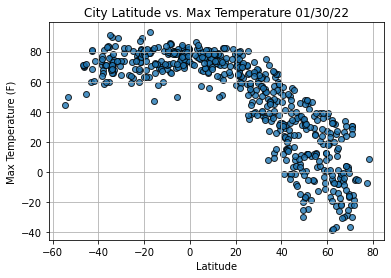

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

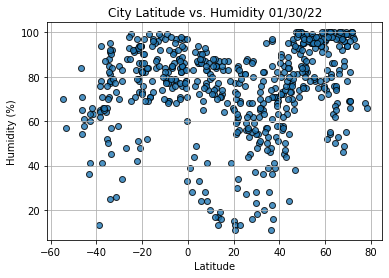

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

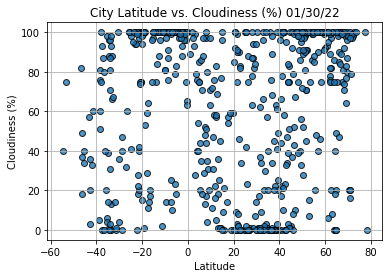

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

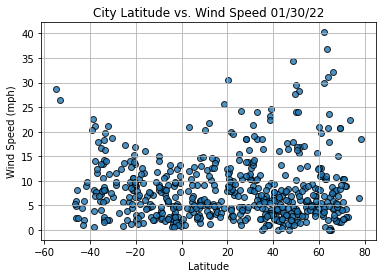

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                    Mahebourg
Country                        MU
Date          2022-01-30 23:55:57
Lat                      -20.4081
Lng                          57.7
Max Temp                    79.09
Humidity                       94
Cloudiness                     75
Wind Speed                   9.22
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
563     True
564    False
565     True
566    False
567    False
Name: Lat, Length: 568, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coahuayana,MX,2022-01-30 23:55:52,18.7333,-103.6833,81.95,41,0,4.43
1,Fortuna,US,2022-01-30 23:55:53,40.5982,-124.1573,56.43,80,0,6.91
3,Pierre,US,2022-01-30 23:55:54,44.3683,-100.3510,39.27,54,83,1.01
7,Narsaq,GL,2022-01-30 23:54:12,60.9167,-46.0500,18.52,83,100,19.66
8,Westport,US,2022-01-30 23:52:07,41.1415,-73.3579,23.76,56,22,4.00


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

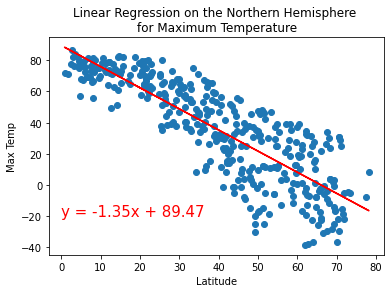

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(0,-20))

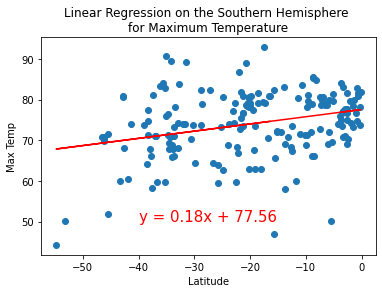

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-40,50))

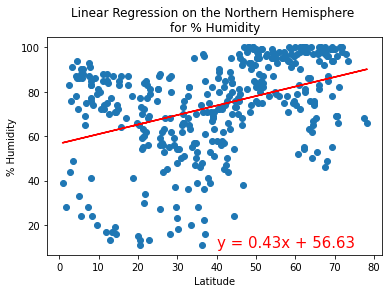

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

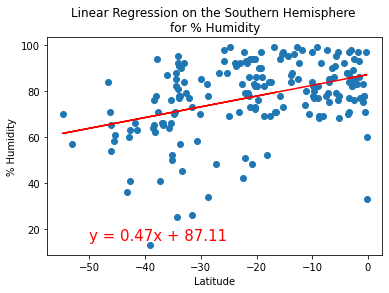

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

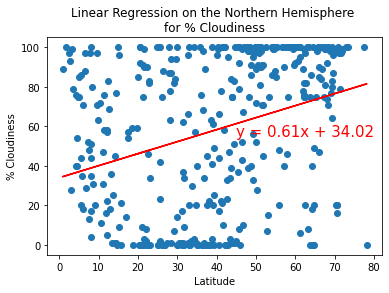

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(45,55))

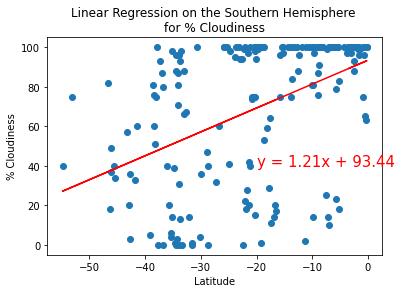

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-20,40))

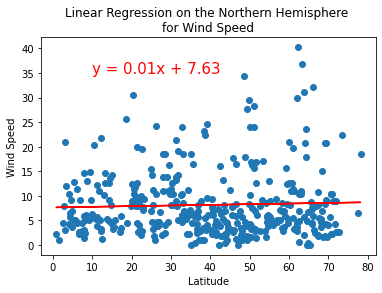

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(10,35))

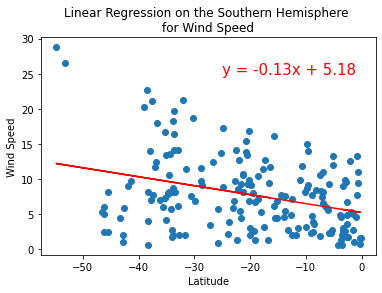

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-25,25))